
# No-show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about 100,000 medical appointments in Brazil. Each row in the dataset includes various characteristics about the patient, such as the day the appointment was scheduled, the patient's neighborhood, enrollment in the Brazilian welfare program Bolsa Família, physical handicap status, patient ID, appointment ID, gender, age, hypertension status, diabetes status, alcoholism status, SMS message receipt, and attendance status. The attendance status is indicated by the 'No-show' column, which indicates whether the patient showed up for their appointment or not. This dataset is potentially useful for identifying factors that may influence attendance at medical appointments and developing strategies to improve patient attendance.



### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:

#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


% matplotlib inline



UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

In [2]:

#loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',parse_dates=['AppointmentDay','ScheduledDay'])

#checking the shape of the datatset
print(df.shape)
      
#checking out few rows
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking out data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       


### Data Cleaning


In [4]:
#check out missing data
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#dropping columns that i wouldn't be using
df.drop(['PatientId','AppointmentID'],axis = 1, inplace = True)

In [6]:
#check for duplicate
df.duplicated().sum()

635

In [7]:
#Removing duplicate
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [8]:
#A function to return Unique values for categorical data
def checkunique(a):
    return {a.name : a.nunique('')}

In [9]:
#checking unique values of Neighbourhood
print(checkunique(df['Neighbourhood']))

{'Neighbourhood': 81}


In [10]:
#compiling the statistic description for the dataframe
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000
mean,37.089506,0.098287,0.197248,0.071825,0.030430,0.022131,0.322881
std,23.121196,0.297704,0.397923,0.258199,0.171768,0.160878,0.467580
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset contains 109892 records and the average age is 37 years old. This suggests that most patients are adults. Only a small percentage (less than 10%) are enrolled in the Brazilian welfare program called Bolsa Família. About 32% of the patients received an SMS, while 3% are alcoholic, 19% are hypertensive, and 7% have diabetes. Additionally, 2% of the patients are handicapped.

In [11]:
#locating row where Age  is -1
df[df['Age']==-1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#Dropping row where Age is -1
df.drop(99832,inplace = True)

In [13]:
#Creating a categorical data 'Age group' from Age column
df['Age_cat'] = pd.cut(df.Age,bins=[0,13,40,90],labels=['Childs','Adults','Elderly'])
df.drop('Age',axis = 1,inplace=True)
df['Age_cat']=df.Age_cat.values.astype('string')
# df.Age_cat = df.Age_cat.astype(str)


In [14]:
checkunique(df['Age_cat'])
df['Age_cat'].value_counts()

Elderly    49276
Adults     38268
Childs     18513
Name: Age_cat, dtype: Int64

In [15]:
#checking categorical data description
df.describe(include= "object")

,Gender,Neighbourhood,No-show
count,109891,109891,109891
unique,2,81,2
top,F,JARDIM CAMBURI,No
freq,71416,7616,87793


The majority of patients (64%) are female and come from 81 different neighborhoods. Most patients (79%) attended their appointments on the scheduled day.


In [16]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,0,0,0,0,No,Elderly
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,0,0,0,0,0,No,Elderly
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,MATA DA PRAIA,0,0,0,0,0,0,No,Elderly
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Childs
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,1,0,0,0,No,Elderly


In [17]:
#selecting colums that are numerical variables
num_dat_var = df.select_dtypes(exclude=['object','datetime64','category']).columns

#checking unique values for numerical variables
for item in num_dat_var:
    print(checkunique(df[item]))
    

{'ScheduledDay': 103548}
{'AppointmentDay': 27}
{'Scholarship': 2}
{'Hipertension': 2}
{'Diabetes': 2}
{'Alcoholism': 2}
{'Handcap': 5}
{'SMS_received': 2}
{'Age_cat': 4}


In [18]:
#Renaming column names
df.rename(columns = {'Handcap':'Handicap','Hipertension':'Hypertension'}, inplace = True)
df.head()


,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_cat
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,0,0,0,0,No,Elderly
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,0,0,0,0,0,No,Elderly
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,MATA DA PRAIA,0,0,0,0,0,0,No,Elderly
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Childs
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,1,0,0,0,No,Elderly


In [19]:
#turning values for Handicamp colum into binary 1 and o
df.loc[df["Handicap"] > 1, "Handicap"] = 1
df['Handicap'].nunique()

2

In [20]:
#function to turn  numerical values into Categorical values
def turnCategorical(column):
    df[column].replace([0, 1],
                        ["No","Yes"], inplace=True)

In [21]:
#Turning numerical variables of scholarship', Hypertension, Diabetes, Alcoholism into Categorical 'Yes' and 'No'
for item in ['Scholarship','Hypertension','Handicap','Diabetes','Alcoholism','SMS_received']:
    turnCategorical(item)
df.head()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_cat
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,No,Yes,No,No,No,No,No,Elderly
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,No,No,No,No,No,No,No,Elderly
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,MATA DA PRAIA,No,No,No,No,No,No,No,Elderly
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,PONTAL DE CAMBURI,No,No,No,No,No,No,No,Childs
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,Elderly


In [22]:
# Creating a new clumn called Appointment_Day_of_week
df['Appointment_Day_of_week'] = df['AppointmentDay'].dt.strftime("%A")
df.head()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_cat,Appointment_Day_of_week
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,No,Yes,No,No,No,No,No,Elderly,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,No,No,No,No,No,No,No,Elderly,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,MATA DA PRAIA,No,No,No,No,No,No,No,Elderly,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,PONTAL DE CAMBURI,No,No,No,No,No,No,No,Childs,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,Elderly,Friday


<a id='eda'></a>
## Exploratory Data Analysis




### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Since most of our columns are categorical data type, to answer this question we first see how the feature varies by doing a countplot for each column


### Countplot for each feature

In [23]:
def showCount(var):
    #using a countplot
    ax = sns.countplot(x=df[var])
    ax.set_title(f"Count for {var}")
    plt.show()


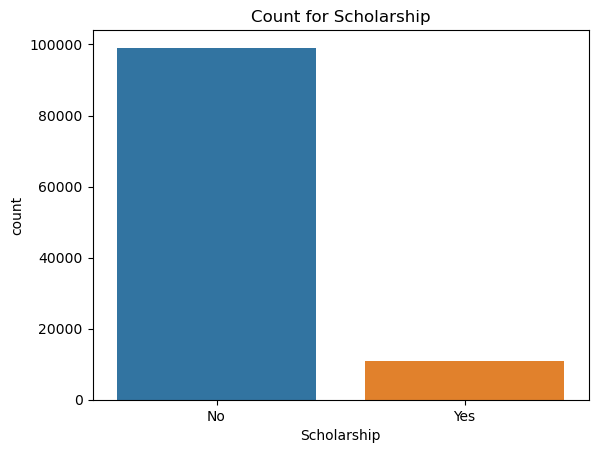

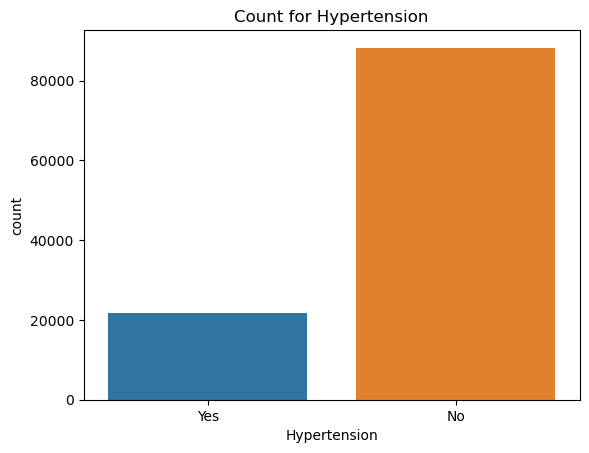

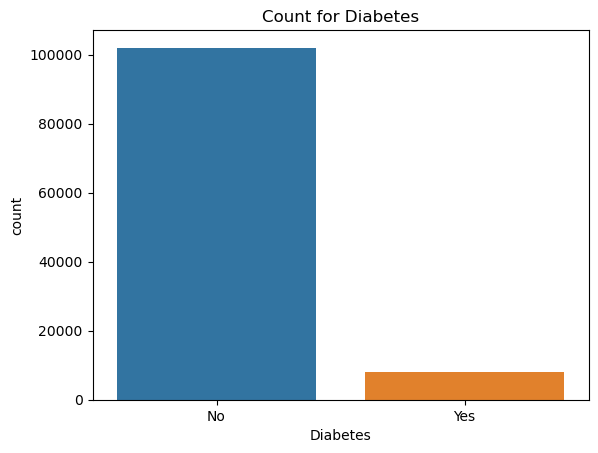

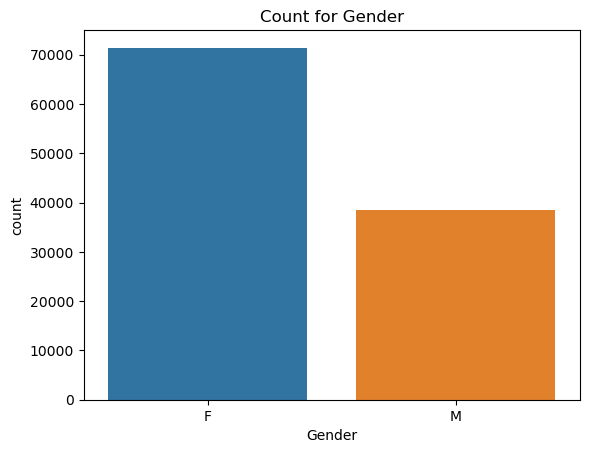

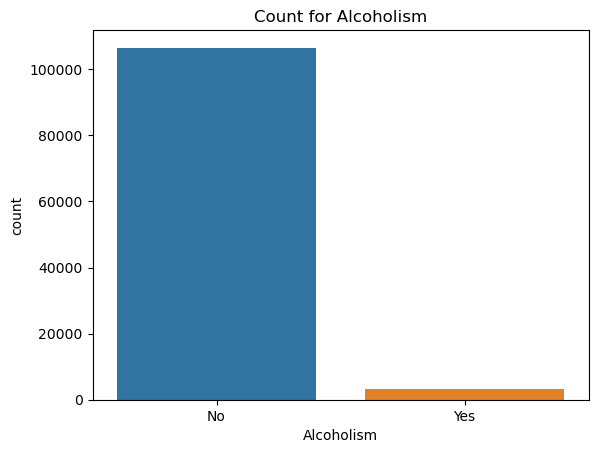

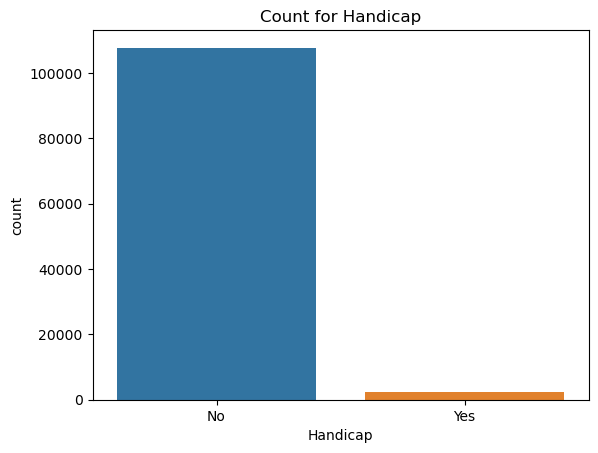

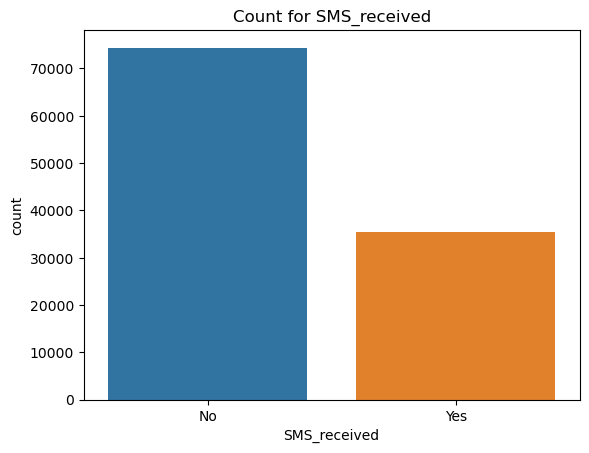

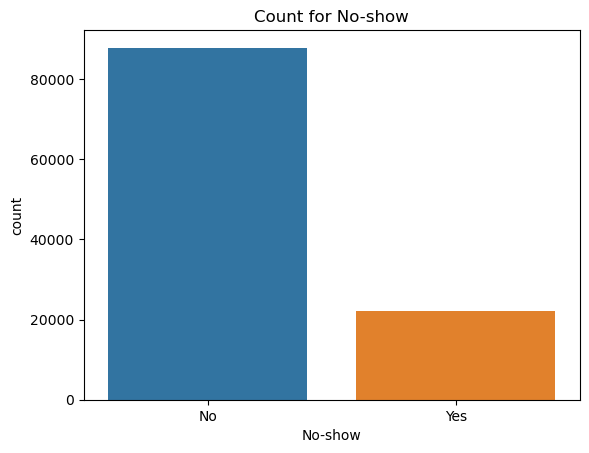

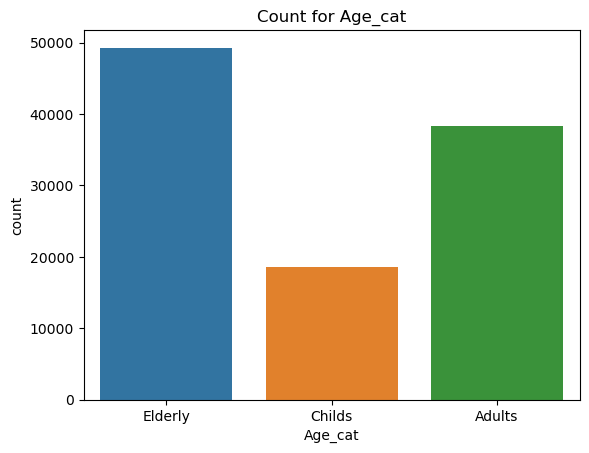

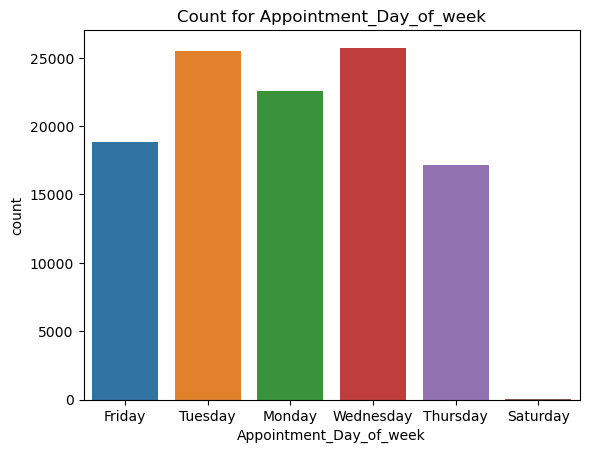

In [24]:
#checking the count of each feature
for item in ['Scholarship','Hypertension','Diabetes','Gender','Alcoholism','Handicap','SMS_received','No-show','Age_cat','Appointment_Day_of_week']:
    showCount(item)
    

Based on the countplots for each feature,it can be deduced that most patients showed up on their appointment day.

majority of the patients in the dataset are not hypertensive or diabetic, are not alcoholic, did not receive SMS messages, and a large percentage of patientswere female. There were also relatively few physically challenged patients in the dataset, and the majority of patients were elderly. 

Tuesday and Wednesday are the busiest days of the week for scheduling appointments in this dataset.

### Counplot for No-show and other feature

In [25]:
def noShowAndOthers(var):
    #using a countplot for no-show and using other variable
    ax=sns.countplot(data = df, x=df['No-show'],hue=var)
    ax.set_title(f'No_show Count for {var} ')
    plt.show()

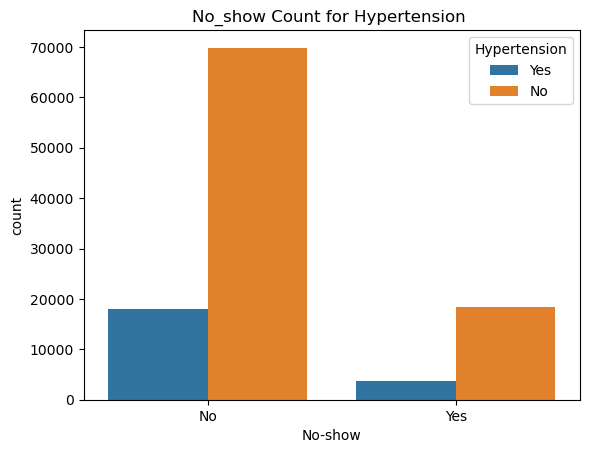

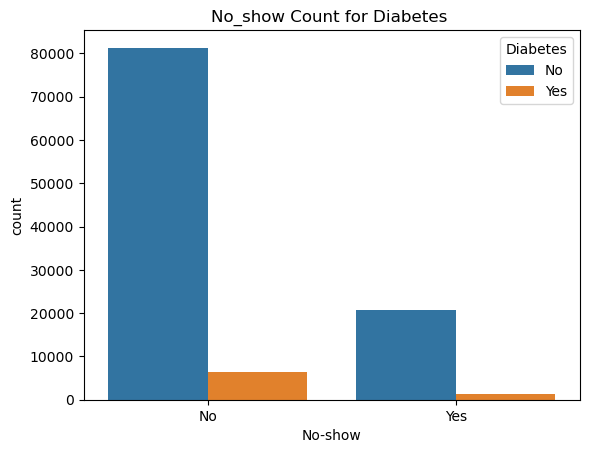

In [26]:
#checking health factors afffect people showing up for appointment on appointment day
for item in ['Hypertension','Diabetes']:
    noShowAndOthers(item)

majority of patients who showed up for their appointments are not diabetic and not hypertensive.

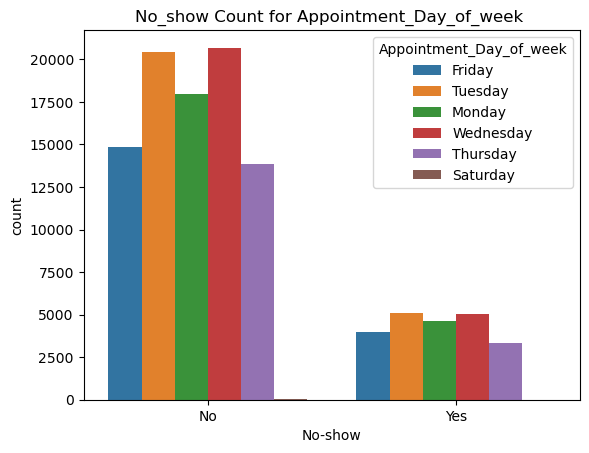

In [27]:
#checking if Day of the week have an influence on whether a patient will show up on appointment day
noShowAndOthers('Appointment_Day_of_week')

Tuesday and Wednesday are the busiest days of the week for scheduling appointments in this dataset. These days also have the highest number of patients who showed up for their appointments, as well as the highest number of patients who did not show up for their appointments.

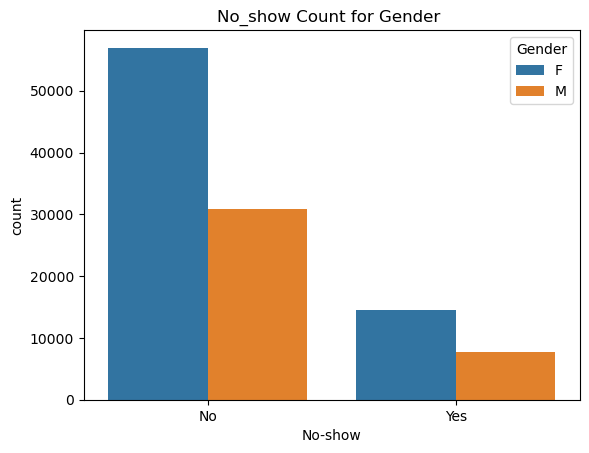

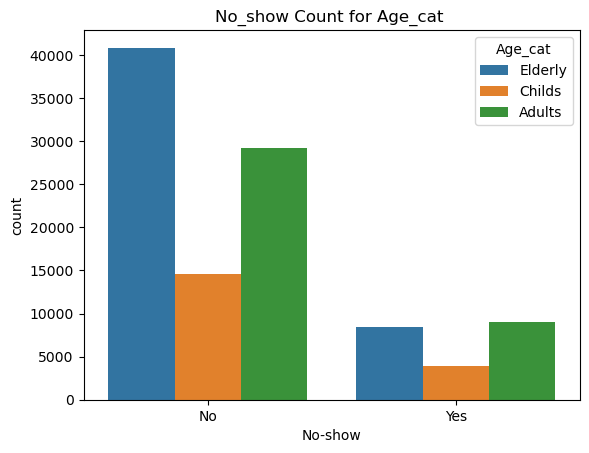

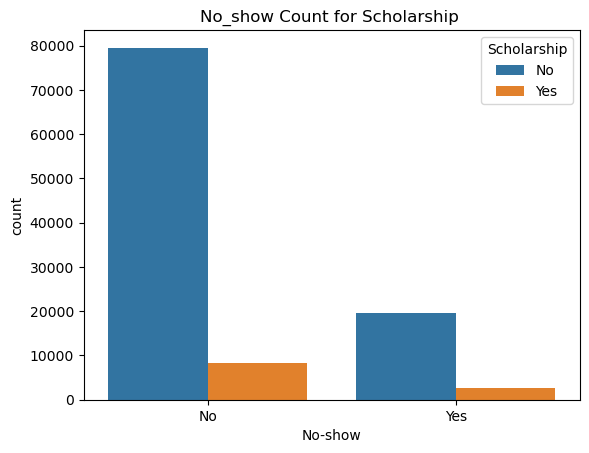

In [28]:
#Gender, Age category and Scholarship
for item in ['Gender','Age_cat','Scholarship']:
    noShowAndOthers(item)

There are more female patients across both categories of patients who showed up for their appointments and those who did not show up. Additionally, more elderly patients showed up for their appointments compared to the adult patient category (age 13-40), which had the highest number of patients who did not show up. The number of patients who are recipients of the Brazilian welfare program Bolsa Família and showed up for their appointments is also higher than those who did not show up.

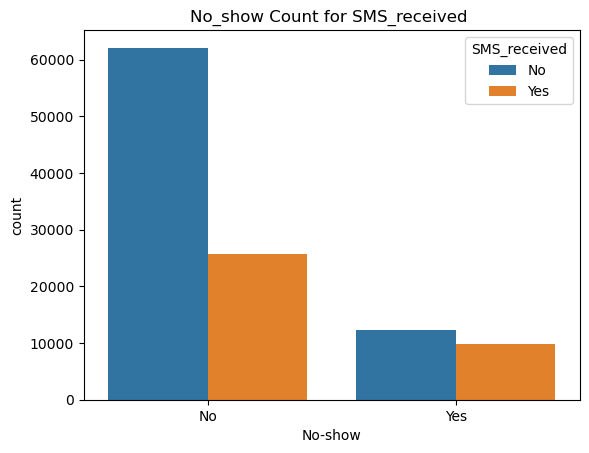

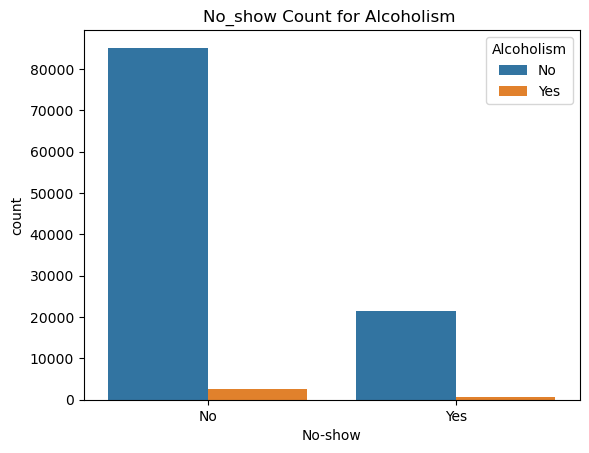

In [29]:
#SMS_received,Alcoholism
for item in ['SMS_received','Alcoholism']:
    noShowAndOthers(item)

It can be deduce that the number of patients who received SMS messages and showed up for their appointments is higher than the number of patients who received SMS messages but did not show up. Similarly, the number of patients who are alcoholic and showed up for their appointments is slightly higher than the number of patients who are not alcoholic and showed up. 

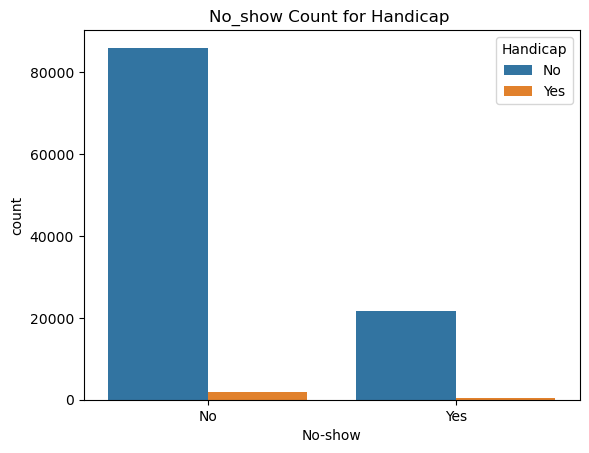

In [30]:
#Handicap and scholarship
noShowAndOthers('Handicap')

There are relatively few physically challenged patients in this dataset compared to fit patients. However, the number of physically challenged patients who showed up for their appointments is still higher than the number who did not show up.

### No-show rates for the different variables in the analysis:

In [31]:
#function to compute No-show rate for each feature
def showNo_Show_rate (var):
    new_df = df.groupby(var,as_index= False)['No-show'].value_counts(normalize=True)
    new_df = new_df[new_df['No-show']=='Yes']
    #creating new label for displaying label in pie chart
    new_df['label'] = new_df[var]+" No-show"  
    print(new_df)
    #visualizing using pie chart and configuring autopct to show percentage of n0-show rate
    plt.pie(new_df['proportion'],labels=new_df['label'],autopct=lambda p: '{:.0f}%'.format(p * sum(new_df['proportion'])))
    plt.show()

  Gender No-show  proportion      label
1      F     Yes    0.202406  F No-show
3      M     Yes    0.198648  M No-show


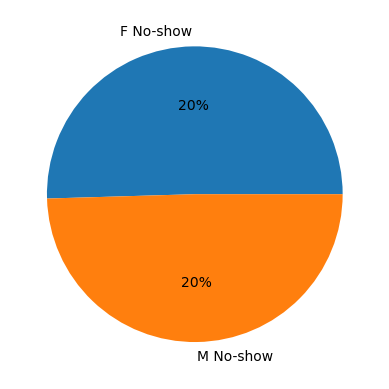

In [32]:
#Gender
showNo_Show_rate ("Gender")

it can be deduce that the no-show rate for both female and male patients is about 20%. This suggests that gender may not significantly influence attendance at medical appointments. Additionally, if the number of patients from one gender who schedule appointments is higher than the number from the other gender, it is likely that the number of patients from the first gender who do not show up for their appointments will also be higher. However, if the number of patients who schedule appointments from each gender is roughly equal, the number of patients who do not show up from each gender may be similar as well.

   Appointment_Day_of_week No-show  proportion              label
1                   Friday     Yes    0.211570     Friday No-show
3                   Monday     Yes    0.205334     Monday No-show
5                 Saturday     Yes    0.230769   Saturday No-show
7                 Thursday     Yes    0.192850   Thursday No-show
9                  Tuesday     Yes    0.199906    Tuesday No-show
11               Wednesday     Yes    0.196317  Wednesday No-show


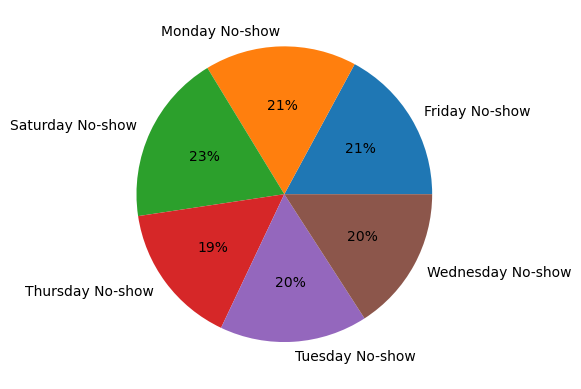

In [33]:
#Appointment_Day_of_week
showNo_Show_rate("Appointment_Day_of_week")

it seems that if a patient's appointment is scheduled for a Saturday, there is a higher chance that the patient will not show up compared to appointments on other days. It appears that the no-show rate for appointments on Saturday is higher than the no-show rate for appointments on other days. 

  SMS_received No-show  proportion        label
1           No     Yes    0.165491   No No-show
3          Yes     Yes    0.275745  Yes No-show


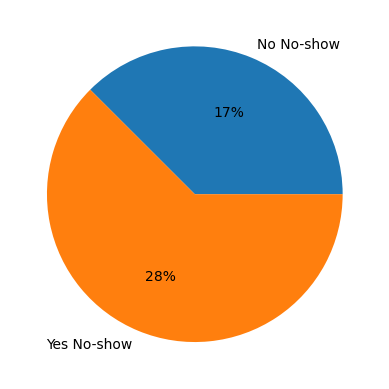

In [34]:
#SMS_received
showNo_Show_rate ("SMS_received")

it appears that patients who receive SMS messages have a higher no-show rate compared to those who do not receive SMS messages.
SMS message receipt shows contrary result to logic as one might expect that receiving reminders via SMS could increase attendance rates. However, there could be other factors at play that contribute to this higher no-show rate for patients who receive SMS messages.

  Alcoholism No-show  proportion        label
1         No     Yes    0.201132   No No-show
3        Yes     Yes    0.199761  Yes No-show


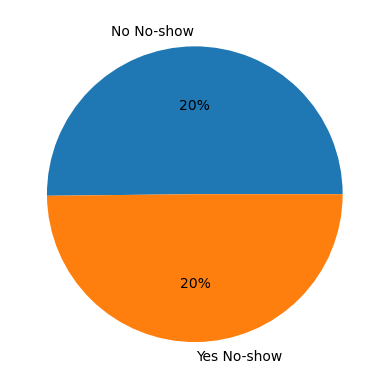

In [35]:
#Alcholisim
showNo_Show_rate ("Alcoholism")

Based on the analyses, it can be deduce that the no-show rates for alcoholic and non-alcoholic patients are the same. This suggests that alcoholism status may not significantly influence attendance at medical appointments.

  Diabetes No-show  proportion        label
1       No     Yes     0.20271   No No-show
3      Yes     Yes     0.18016  Yes No-show


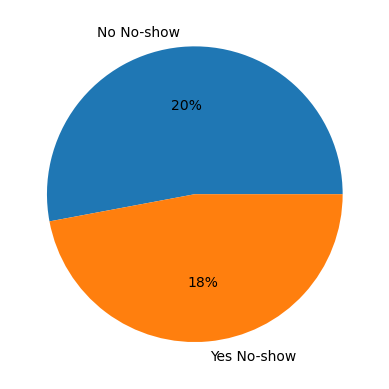

In [36]:
#Diabetes
showNo_Show_rate ("Diabetes")

From the analyses that the no-show rate for non-diabetic patients is 20% while the no-show rate for diabetic patients is 18%.  
This suggests that diabetes status may be a factor in attendance at medical appointments, with diabetic patients having a slightly lower no-show rate compared to non-diabetic patients.

  Hypertension No-show  proportion        label
1           No     Yes    0.208241   No No-show
3          Yes     Yes    0.171987  Yes No-show


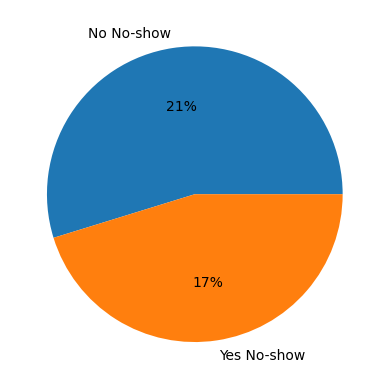

In [37]:
#Hypertension
showNo_Show_rate ("Hypertension")

The no-show rate for non-hypertensive patients is 21% while the no-show rate for hypertensive patients is 17%. This suggests that hypertension status may be a factor in attendance at medical appointments, with hypertensive patients having a slightly lower no-show rate compared to non-hypertensive patients.  

   Age_cat No-show  proportion            label
1   Adults     Yes    0.235602   Adults No-show
3   Childs     Yes    0.212877   Childs No-show
5  Elderly     Yes    0.171402  Elderly No-show


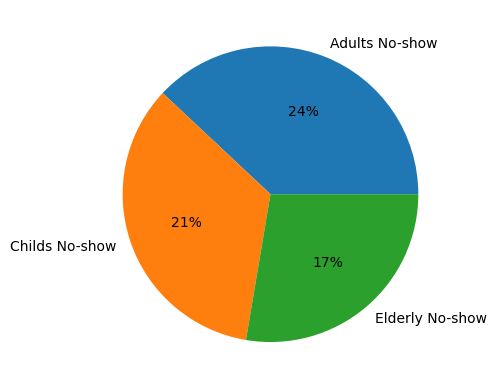

In [38]:
#Age_cat
showNo_Show_rate ("Age_cat")

The no-show rates for adult, elderly, and child patients are 24%, 17%, and 21%, respectively. This suggests that age may be a factor in attendance at medical appointments, with elderly patients having a lower no-show rate compared to adult and child patients. 

  Handicap No-show  proportion        label
1       No     Yes    0.201529   No No-show
3      Yes     Yes    0.179811  Yes No-show


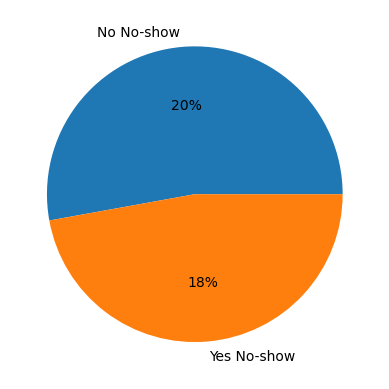

In [39]:
#Handicap
showNo_Show_rate ("Handicap")

Handicapped patients having a slightly lower no-show rate compared to non-handicapped patients with no-show rates for handicapped and non-handicapped patients 18% and 20%, respectively. This suggests that handicap status may be a factor in attendance at medical appointments

  Scholarship No-show  proportion        label
1          No     Yes    0.197215   No No-show
3         Yes     Yes    0.236645  Yes No-show


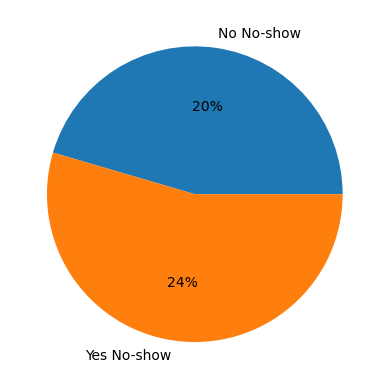

In [40]:
#Scholarship
showNo_Show_rate ("Scholarship")

scholarship status may be a factor in attendance at medical appointments, with patients without scholarships having a slightly lower no-show rate compared to patients with scholarships.

## Conclusions








The no-show rate analysis shows that gender and alcoholism are not significant factors in predicting whether a patient will show up for their scheduled appointment. 

SMS message receipt, age, health conditions, receipt of the Brazilian welfare program Bolsa Família, and handicap status may influence attendance at medical appointments. 

It is also noted that appointment days may have an effect on attendance, with Saturday having the lower attendance rates.

However, It is difficult to conclude which feature is a factor in attendance at medical appointments based on the analyses alone.

The analysis is limited by the wide difference in the number of patients who show up versus those who do not show up may, this make it challenging to identify contributing factors. A more balanced dataset may be useful for more clearly identifying these factors.

Overall, it is important to consider the potential influence of multiple factors on attendance at medical appointments and to use statistical analysis or machine learning techniques to more accurately identify the factors that are most strongly associated with attendance and to estimate the strength of these relationships.
